In [ ]:
!pip install opendatasets -qq
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/hemendrasr/pizza-vs-ice-cream')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

In [ ]:
train_dir = r'/content/pizza-vs-ice-cream/dataset/train'
test_dir = r'/content/pizza-vs-ice-cream/dataset/test'
val_dir = r'/content/pizza-vs-ice-cream/dataset/valid'

In [ ]:
train_generator = image_dataset_from_directory(train_dir, image_size=(128, 128), batch_size=32)
test_generator = image_dataset_from_directory(test_dir, image_size=(128, 128), batch_size=32)
val_generator = image_dataset_from_directory(val_dir, image_size=(128, 128), batch_size=32)

Found 718 files belonging to 2 classes.
Found 106 files belonging to 2 classes.
Found 208 files belonging to 2 classes.


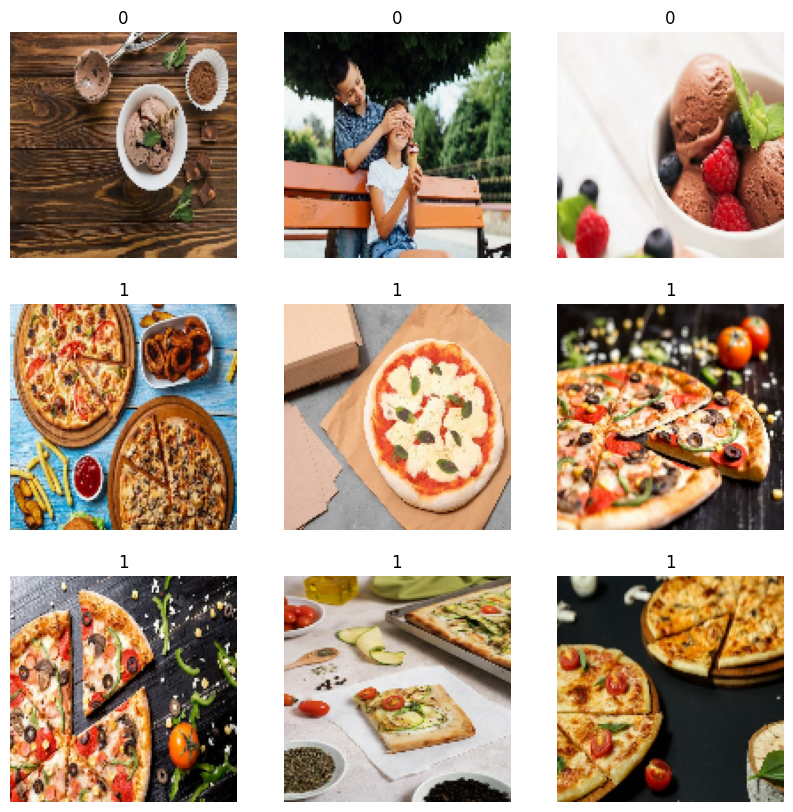

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), input_shape=(128, 128, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,914,369 (14.93 MB)

 Trainable params: 3,912,449 (14.92 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
callback = EarlyStopping(
                            monitor='val_accuracy',
                            patience=5,
                            restore_best_weights=True
                        )

logs = model.fit(
                  train_generator,
                  epochs=2,
                  validation_data=val_generator,
                  callbacks=[callback],
                )

plt.title('Training Log')
plt.plot(logs.history['loss'], label='Training Loss')
plt.plot(logs.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.title('Validation Log')
plt.plot(logs.history['val_loss'], label='Validation Loss')
plt.plot(logs.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

Epoch 1/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.6836 - loss: 3.6495 - val_accuracy: 0.4519 - val_loss: 108.7854
Epoch 2/2
23/23 ━━━━━━━━━━━━━━━━━━━━ 207s 6s/step - accuracy: 0.8356 - loss: 0.9122 - val_accuracy: 0.4567 - val_loss: 12.4679


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4378 - loss: 10.2892
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 796ms/step


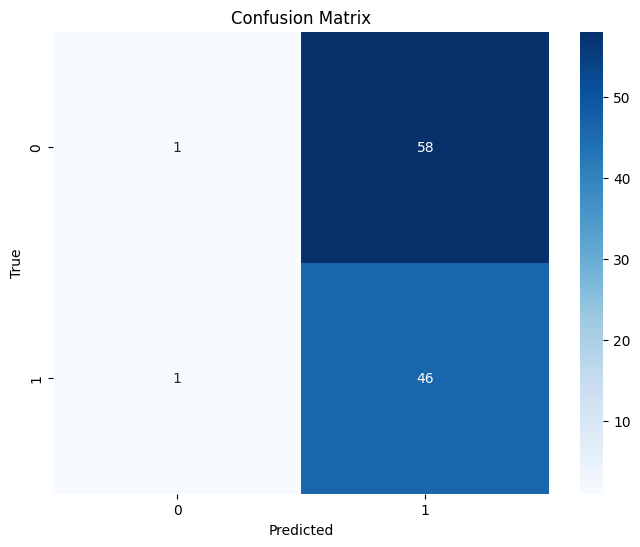

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.02      0.03        59
           1       0.44      0.98      0.61        47

    accuracy                           0.44       106
   macro avg       0.47      0.50      0.32       106
weighted avg       0.47      0.44      0.29       106



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model.evaluate(test_generator)

y_pred = model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
# y_pred_classes = np.argmax(y_pred, axis=1)  # For multi-class classification
y_true = np.concatenate([y for x, y in test_generator], axis=0)

import numpy as np
y_pred_classes = np.where(y_pred > 0.5, 1, 0)
y_true = np.concatenate([y for x, y in test_generator], axis=0)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('Classification Report')
print(classification_report(y_true, y_pred_classes))